In [1]:
import mytools
import pandas as pd
import geopandas as gpd
import matplotlib,re

In [1]:
import kml2geojson

In [ ]:
kml2geojson.

In [2]:
f = mytools.othern.file_name_paths('c:/Users/Administrator/Desktop/李祥峰/地市表/')

tichu = pd.read_excel('c:/Users/Administrator/Desktop/李祥峰/剔除表.xlsx')

for name in f:
    data_t = pd.read_csv(name,encoding='gbk')
    data_t = data_t.reset_index()
    data_t = data_t.rename(columns={'index':'index_use'})
    res = data_t.merge(tichu,how='left',on='NCGI',indicator=True)
    res = res.drop_duplicates('index_use')
    res = res.loc[res['_merge']=='left_only']
    res.drop(columns=['index_use','_merge']).to_csv('c:/Users/Administrator/Desktop/李祥峰/结果/'+name.split('/')[-1],index=False)
    print(name,f'共计{data_t.shape[0]}行，输出{res.shape[0]}行')

In [2]:
from shapely.geometry import Polygon,Point,LineString,MultiPolygon

In [413]:
mx=pd.read_csv('c:/Users/Administrator/Desktop/天线/天线/F天线.txt',encoding='gbk',sep='\t')

a = mx['Pattern'][0]

def fc(x):
    a = x['Pattern']
    b = a.split(' ')
    name_o=1
    go='第一次开始'
    use_list =[]
    use_dict =dict()
    st=0
    id_use = -1
    for nu,name in enumerate(b):
        if name =='':
            go='重新开始'
            st = 0
        if (str(name_o) =='0') and (str(name) == '360')and (go=='第一次开始'):
            st=1
        elif (str(name_o) =='0') and (str(name) == '360')and (go=='重新开始'):
            st=1
            id_use=-1
        if st==1:
            if nu%2==1:
                use_list.append(str(id_use)+'_'+str(name))
                id_use = id_use +1
        name_o = name
    return use_list

mx['fw_list']=mx.apply(fc,axis=1)

linshi = pd.DataFrame(mx['fw_list'][0])[0].str.split('_',expand=True)

linshi.columns=['角度','电平']

linshi2 = linshi.T

import matplotlib.pyplot as plt

data_use = linshi.iloc[1:361]

jiaodu = list(data_use['角度'])

dianping = list(data_use['电平'])

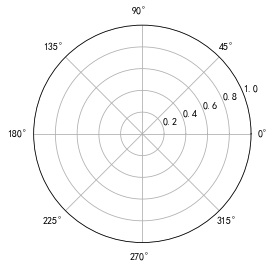

In [403]:
#第1步：导出模块
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager # 中文字体设置第1步，导出模块

#导出模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels=linshi2.columns.values #特征值
kinds = list(linshi2.index) #成员变量
result = pd.concat([linshi2, linshi2[[labels[0]]]], axis=1) # 由于在雷达图中，
centers = np.array(linshi2.iloc[:,:])

n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)# 设置雷达图的角度,用于平分切开一个圆面
angle = np.concatenate((angle, [angle[0]]))#为了使雷达图一圈封闭起来,需要下面的步骤

fig = plt.figure()
ax = fig.add_subplot(111, polar=True) # 参数polar, 以极坐标的形式绘制图

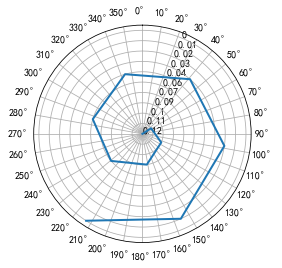

In [298]:
fig = plt.figure(2)                                #新开一个窗口
ax1 = fig.add_subplot(111,polar=True)                  #启动一个极坐标子图
ax1.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax1.set_theta_zero_location('N') # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax1.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。

theta=np.arange(0,2*np.pi,0.02)              #角度数列值
ax1.plot(jiaodu[1:12],dianping[1:12],lw=2)   #画图，参数：角度，半径，lw线宽
# ax1.plot(list(range(0,len(dianping))),dianping,linestyle='--',lw=2)           #画图，参数：角度，半径，linestyle样式，lw线宽
plt.show()

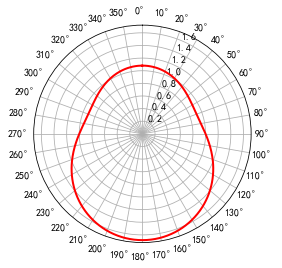

In [404]:
theta = np.arange(0, 2*np.pi, 0.02)
phi0 = 2
k = 1

ax = plt.subplot(111,polar=True)
ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N') # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。

plt.plot(theta, np.sqrt(np.square(np.cos(theta))+2*k*np.cos(phi0)*np.cos(theta)+np.square(k)),  color=[1,0 ,0], lw=2)
# plt.title("k="+str(k)+",phi0="+str(phi0), y=-0.15, fontsize=18)
# plt.savefig("k="+str(k)+" with phi0="+str(phi0)+'.png')
plt.show()

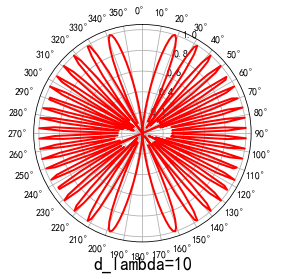

In [299]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0, 2*np.pi, 0.02)
d_lambda = 10

ax = plt.subplot(111,polar=True)
ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N')  # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax.set_theta_direction(-1)  # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。
plt.plot(theta, np.abs(np.sin(d_lambda*np.pi*np.cos(theta))),  color=[1,0 ,0], lw=2)
plt.title("d_lambda="+str(d_lambda), y=-0.15, fontsize=18)
# plt.savefig('d_lambda='+str(d_lambda)+'.png')
plt.show()

In [174]:
aaa = data_use['电平'][:315]

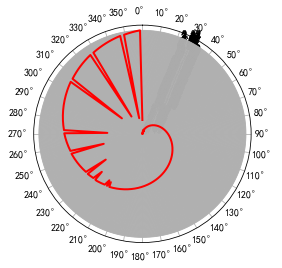

In [303]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0, 2*np.pi, 0.02)
phi0 = 1
k = 1

ax = plt.subplot(111,polar=True)
ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N') # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。
plt.plot(theta, np.array(dianping[0:315]),  color=[1,0 ,0], lw=2)
# plt.title("k="+str(k)+",phi0="+str(phi0), y=-0.15, fontsize=18)
# plt.savefig("k="+str(k)+" with phi0="+str(phi0)+'.png')
plt.show()

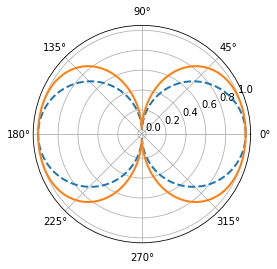

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0, 2*np.pi, 0.02)
r=np.cos(theta)
plt.subplot(111,polar=True)
plt.plot(theta, np.abs(np.cos(theta)), '--', lw=2)
plt.plot(theta, np.abs(np.sin(0.5*np.pi*np.cos(theta))), lw=2)

# plt.subplot(122,polar=True)
# plt.plot(theta, np.abs(np.sin(0.6*np.pi*np.cos(theta))), '--', lw=2)
# plt.plot(theta, np.abs(np.sin(0.51*np.pi*np.cos(theta))), lw=2)
# plt.rgrids(np.arange(0.5,2,0.5),angle=45)
# plt.thetagrids([0,45,90])
plt.show()


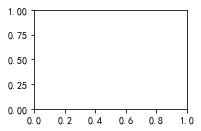

In [307]:
plt.subplot(221)

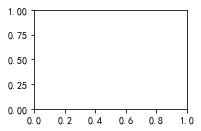

In [308]:
# equivalent but more general
ax1=plt.subplot(2, 2, 1)

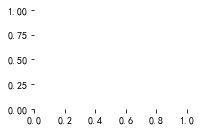

In [309]:
# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

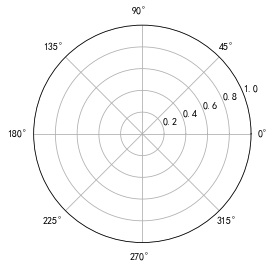

In [315]:
plt.subplot(111,polar=True)

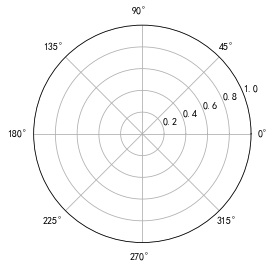

In [314]:
# add a polar subplot
plt.subplot(111, projection='polar')

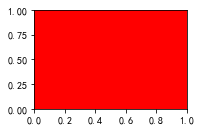

In [311]:
# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

In [312]:
# delete ax2 from the figure
plt.delaxes(ax2)

In [317]:
np.random.seed(19680801)

In [318]:
np.linspace(0.0, 2 * np.pi, N, endpoint=False)

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [319]:
np.random.rand(N)

array([0.7003673 , 0.74275081, 0.70928001, 0.56674552, 0.97778533,
       0.70633485, 0.24791576, 0.15788335, 0.69769852, 0.71995667,
       0.25774443, 0.34154678, 0.96876117, 0.6945071 , 0.46638326,
       0.7028127 , 0.51178587, 0.92874137, 0.7397693 , 0.62243903])

In [320]:
np.pi / 4 * np.random.rand(N)

array([0.51172261, 0.31165197, 0.42665922, 0.62823962, 0.5666999 ,
       0.23197833, 0.1264066 , 0.1618906 , 0.10549891, 0.3774663 ,
       0.269016  , 0.28507541, 0.76412773, 0.08713491, 0.3049419 ,
       0.6150185 , 0.76411172, 0.37951194, 0.26422452, 0.44564987])

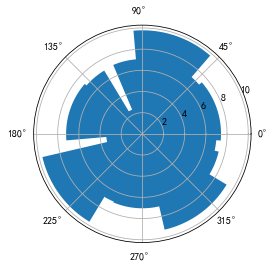

In [327]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


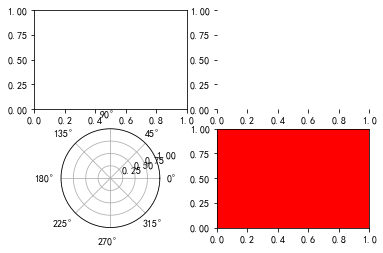

In [306]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

In [350]:
dianping[:315]

['0.13',
 '0.12',
 '0.11',
 '0.1',
 '0.09',
 '0.07',
 '0.06',
 '0.04',
 '0.03',
 '0.02',
 '0.01',
 '0',
 '0',
 '0',
 '0.01',
 '0.03',
 '0.05',
 '0.08',
 '0.12',
 '0.17',
 '0.22',
 '0.28',
 '0.35',
 '0.43',
 '0.51',
 '0.6',
 '0.7',
 '0.79',
 '0.9',
 '1.01',
 '1.11',
 '1.23',
 '1.34',
 '1.45',
 '1.57',
 '1.68',
 '1.79',
 '1.9',
 '2.02',
 '2.13',
 '2.24',
 '2.36',
 '2.47',
 '2.59',
 '2.71',
 '2.83',
 '2.96',
 '3.09',
 '3.22',
 '3.37',
 '3.52',
 '3.68',
 '3.84',
 '4.01',
 '4.19',
 '4.38',
 '4.58',
 '4.78',
 '4.99',
 '5.21',
 '5.44',
 '5.68',
 '5.92',
 '6.17',
 '6.43',
 '6.69',
 '6.95',
 '7.23',
 '7.5',
 '7.78',
 '8.07',
 '8.35',
 '8.64',
 '8.92',
 '9.21',
 '9.51',
 '9.8',
 '10.1',
 '10.39',
 '10.69',
 '10.98',
 '11.28',
 '11.58',
 '11.88',
 '12.18',
 '12.49',
 '12.8',
 '13.1',
 '13.41',
 '13.73',
 '14.04',
 '14.36',
 '14.67',
 '14.99',
 '15.31',
 '15.63',
 '15.94',
 '16.26',
 '16.57',
 '16.88',
 '17.18',
 '17.47',
 '17.76',
 '18.05',
 '18.32',
 '18.59',
 '18.85',
 '19.11',
 '19.36',
 '19.6

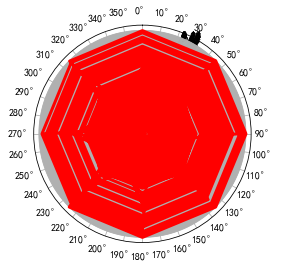

In [356]:
import numpy as np
import matplotlib.pyplot as plt

'''
    极坐标分为：极径和角度

'''
r = dianping

theta = [i*np.pi/4 for i in range(360)]


ax = plt.subplot(111,projection='polar')
#projection = 'polar' 指定为极坐标

ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N') # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。

ax.plot(theta, r, linewidth=3,color='red')
#第一个参数为角度，第二个参数为极径

ax.grid(True) #是否有网格

plt.show()

In [329]:
r

[6, 6, 6, 6, 6, 6, 6, 6, 6]

In [337]:
a = [x for x in range(0,9)]

In [354]:
jiaodu = np.arange(0, 2*3.6, 0.02)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


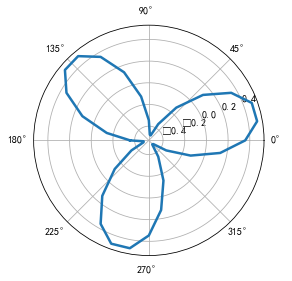

In [352]:
#!usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-180.0,190.0,10)
theta = (np.pi/180.0 )*x    # in radians

offset = 2.0

R1 = [-0.358,-0.483,-0.479,-0.346,-0.121,0.137,0.358,0.483,0.479,0.346,0.121,\
-0.137,-0.358,-0.483,-0.479,-0.346,-0.121,0.137,0.358,0.483,0.479,0.346,0.121,\
-0.137,-0.358,-0.483,-0.479,-0.346,-0.121,0.137,0.358,0.483,0.479,0.346,0.121,\
-0.137,-0.358]

fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax1.set_rmax(1)
ax1.plot(theta,R1,lw=2.5)

In [360]:
np.array([i for i in jingke.values()]).astype(int) #提取英雄的信息

array([100,  30,  90,  60,  60,  20])

In [361]:
np.array([j for j in jingke.keys()]) #提取键作为标签

array(['推进', '战绩（KDA）', '生存', '团战', '发育', '输出'], dtype='<U7')

In [379]:
 np.linspace(0, 2*np.pi, 10, endpoint=False)

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678])

In [ ]:
theta = np.arange(0, 2*np.pi, 0.02)

In [392]:
theta = np.arange(0, 2*360, 0.02)

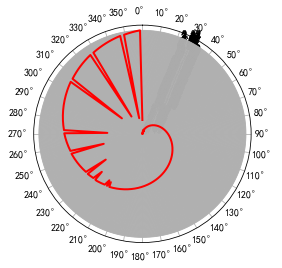

In [393]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0, 2*np.pi, 0.02)
phi0 = 1
k = 1

ax = plt.subplot(111,polar=True)
ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N') # 用于设置极坐标0°位置,其值可为'N','NW','W','SW','S','SE','E','NE'
ax.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。

plt.plot(theta, np.array(dianping[0:315]),  color=[1,0 ,0], lw=2)
# plt.title("k="+str(k)+",phi0="+str(phi0), y=-0.15, fontsize=18)
# plt.savefig("k="+str(k)+" with phi0="+str(phi0)+'.png')
plt.show()

In [421]:
aa = open('d:/aaa.txt','w')

In [423]:
def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")

In [425]:
text_save('d:/aaa.txt',jiaodu)
text_save('d:/bbb.txt',dianping)

保存文件成功
保存文件成功


In [427]:
len(jiaodu)
len(dianping)

360

In [416]:
jiaodu2 = [int(x)/180.0*3.141593 for x in jiaodu]

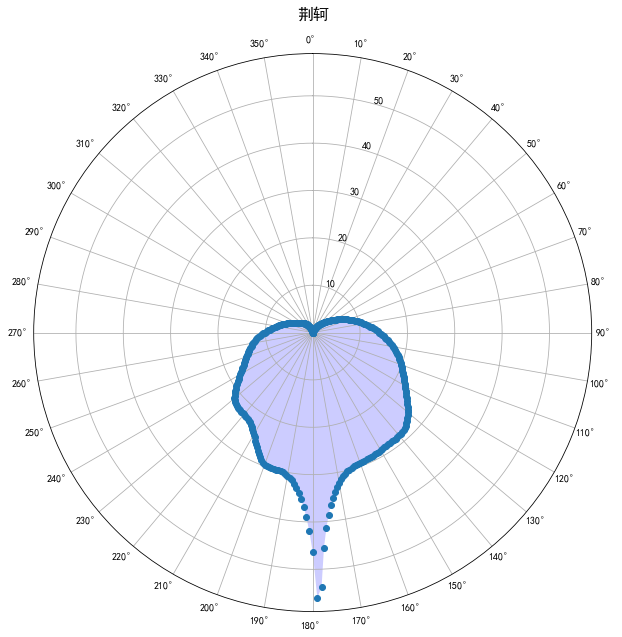

In [446]:
import numpy as np
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,13))
ax=fig.add_subplot(111,polar=True) #设置一个坐标轴为极坐标体系
ax.set_thetagrids(np.arange(0.0, 360.0, 10.0)) # 用于设置极坐标角度网格线显示
ax.set_theta_zero_location('N') #设置极坐标0°位置
ax.set_theta_direction(-1) # 用于设置极坐标的正方向，参数为-1时为顺时针方向；反之。

y=np.array([i for i in dianping]).astype(float) #提取英雄的信息
x = np.linspace(0, 2*np.pi, 360, endpoint=False) #data1里有几个数据，就把整圆360°分成几份
x1 = np.concatenate((x, [x[0]])) #将x的第一个值添加到原来的x组成第一个和最后一个元素一致的新列表，以实现x闭合
y1 = np.concatenate((y, [y[0]])) #将y的第一个值添加到原来的y组成第一个和最后一个元素一致的新列表，以实现y闭合

#绘制极坐标
# ax.set_thetagrids(angles*180/np.pi, label, fontproperties="Microsoft Yahei") #设置网格标签
ax.plot(x1,y1,"o")

# ax.set_rlim(0,100) #设置显示的极径范围
ax.fill(x1,y1,facecolor='b', alpha=0.2) #填充颜色
ax.set_rlabel_position(15)
ax.set_title("荆轲",fontproperties="SimHei",fontsize=16) #设置标题
plt.show()

In [492]:
data = pd.read_clipboard()

In [498]:
y=np.array([i for i in dianping]).astype(float) #提取英雄的信息
x = np.linspace(0, 2*np.pi, 360, endpoint=False) #data1里有几个数据，就把整圆360°分成几份

In [509]:
xz = [y1*np.cos(x1) for x1,y1 in zip(x,y)]

yz = [y1*np.sin(x1) for x1,y1 in zip(x,y)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


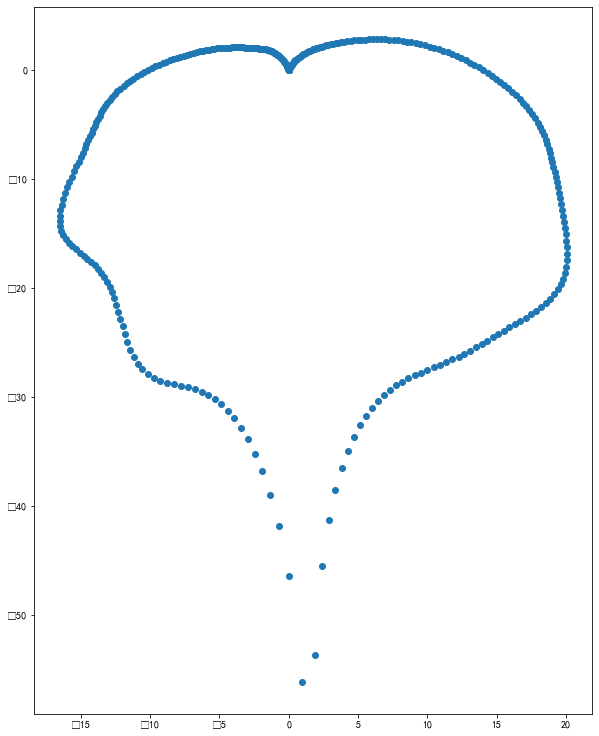

In [512]:
fig=plt.figure(figsize=(10,13))
ax=fig.add_subplot(111) #设置一个坐标轴为极坐标体系

ax.plot(yz,xz,'o')
plt.show()

In [495]:
import cmath

In [497]:
cn1 = cmath.rect(2, cmath.pi)
cn1.real
cn1.imag

2.4492935982947064e-16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [456]:
np.sqrt(X ** 2 + Y ** 2)

array([[5.65685425, 5.48292805, 5.31507291, ..., 5.15388203, 5.31507291,
        5.48292805],
       [5.48292805, 5.30330086, 5.12957113, ..., 4.96235831, 5.12957113,
        5.30330086],
       [5.31507291, 5.12957113, 4.94974747, ..., 4.77624329, 4.94974747,
        5.12957113],
       ...,
       [5.15388203, 4.96235831, 4.77624329, ..., 4.59619408, 4.77624329,
        4.96235831],
       [5.31507291, 5.12957113, 4.94974747, ..., 4.77624329, 4.94974747,
        5.12957113],
       [5.48292805, 5.30330086, 5.12957113, ..., 4.96235831, 5.12957113,
        5.30330086]])

(-2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


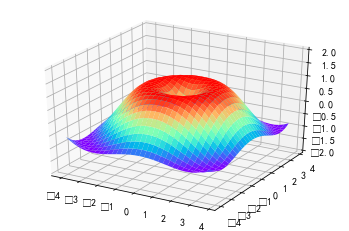

In [450]:
fig = plt.figure()
# 创建3d图形的两种方式
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)
# rstride:行之间的跨度  cstride:列之间的跨度
# rcount:设置间隔个数，默认50个，ccount:列的间隔个数  不能与上面两个参数同时出现
#vmax和vmin  颜色的最大值和最小值
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
# zdir : 'z' | 'x' | 'y' 表示把等高线图投射到哪个面
# offset : 表示等高线图投射到指定页面的某个刻度
# ax.contourf(X,Y,Z,zdir='z',offset=-2)
# 设置图像z轴的显示范围，x、y轴设置方式相同
ax.set_zlim(-2,2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


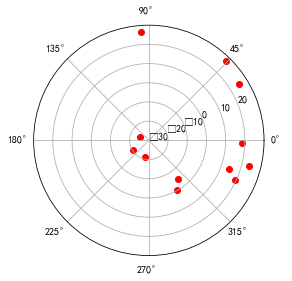

In [460]:
import numpy
import matplotlib.pyplot as pyplot

ra = [345.389547454166689,31.892236646759279,45.893722479722229,93.955296573703706,160.079453957685217,211.154701609814822,256.486559377222193,307.258751710462889,299.691923545370344,340.364168244814834,335.077343971296386,358.126565808425880]
dec = [23.835021447037050,25.218513920000003,27.509148433518519,26.551432991388879,-25.077519630833340,-20.134061982500004,-21.042512836851849,-4.903512838240742,-0.506450475370370,14.280932901944448,19.222101837500002,18.792707990925926]   
ra  = [x/180.0*3.141593 for x in ra]
fig = pyplot.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_ylim(-30,30)
ax.set_yticks(numpy.arange(-30,30,10))
ax.scatter(ra,dec,c ='r')


pyplot.show()  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

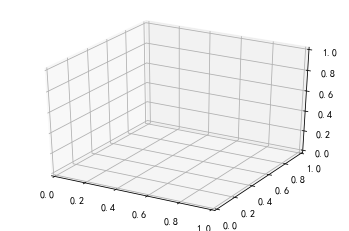

In [467]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
x,y=np.mgrid[-2:2:20j,-2:2:20j]
z=x*np.exp(-x**2-y**2)

ax=plt.subplot(111,projection='3d')
ax.plot_surface(x1,y1,z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
plt.show()

In [513]:
lonlat_coordinate = []  # 经纬度坐标集
def millerToLonLat(x,y):
    """
    将平面坐标系中的x,y转换为经纬度，利用米勒坐标系
    :param x: x轴
    :param y: y轴
    :return:
    """
    L = 6381372 * math.pi*2
    W = L
    H = L/2
    mill = 2.3
    lat = ((H/2-y)*2*mill)/(1.25*H)
    lat = ((math.atan(math.exp(lat))-0.25*math.pi)*180)/(0.4*math.pi)
    lon = (x-W/2)*360/W
    # TODO 最终需要确认经纬度保留小数点后几位
    lonlat_coordinate.append((round(lon,7),round(lat,7)))
    return lonlat_coordinate

In [516]:
millerToLonLat(0,0)

[(-179.999982, 89.9394075), (-180.0, 89.9394075), (-180.0, 89.9395012)]